# First steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
#Cargar datos csv
data = pd.read_csv('HR_test.csv')

In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df

In [4]:
df_exploration(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [5]:
# Standardize the column names
data.columns = data.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

In [6]:
data.columns

Index(['employee_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work_life_balance', 'job_satisfaction',
       'performance_rating', 'number_of_promotions', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'number_of_dependents', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition', 'attrition'],
      dtype='object')

In [7]:
data.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [8]:
data['gender'].value_counts() 

gender
Male      8087
Female    6813
Name: count, dtype: int64

In [9]:
data['job_role'].value_counts() 

job_role
Technology    3815
Healthcare    3432
Education     3168
Media         2422
Finance       2063
Name: count, dtype: int64

In [10]:
data['work_life_balance'].value_counts() 

work_life_balance
Good         5630
Fair         4483
Excellent    2713
Poor         2074
Name: count, dtype: int64

In [11]:
data['job_satisfaction'].value_counts() 

job_satisfaction
High         7466
Very High    2968
Medium       2900
Low          1566
Name: count, dtype: int64

In [12]:
data['performance_rating'].value_counts() 

performance_rating
Average          8909
High             3022
Below Average    2189
Low               780
Name: count, dtype: int64

In [13]:
data['education_level'].value_counts()

education_level
Bachelor’s Degree    4505
Associate Degree     3734
Master’s Degree      3001
High School          2932
PhD                   728
Name: count, dtype: int64

In [14]:
data['marital_status'].value_counts()

marital_status
Married     7511
Single      5166
Divorced    2223
Name: count, dtype: int64

In [15]:
data['job_level'].value_counts()

job_level
Mid       5925
Entry     5913
Senior    3062
Name: count, dtype: int64

In [16]:
data['company_size'].value_counts()

company_size
Medium    7486
Small     4420
Large     2994
Name: count, dtype: int64

In [17]:
data['remote_work'].value_counts()

remote_work
No     12061
Yes     2839
Name: count, dtype: int64

In [18]:
data['leadership_opportunities'].value_counts()

leadership_opportunities
No     14165
Yes      735
Name: count, dtype: int64

In [19]:
data['innovation_opportunities'].value_counts()

innovation_opportunities
No     12499
Yes     2401
Name: count, dtype: int64

In [20]:
data['company_reputation'].value_counts()

company_reputation
Good         7416
Poor         3082
Fair         2969
Excellent    1433
Name: count, dtype: int64

In [21]:
data['employee_recognition'].value_counts()

employee_recognition
Low          5862
Medium       4624
High         3706
Very High     708
Name: count, dtype: int64

In [22]:
data['attrition'].value_counts()

attrition
Stayed    7868
Left      7032
Name: count, dtype: int64

In [23]:
data.head(10)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed


## Transform into numbers

In [24]:
def boolean_to_numeric(df):
    # Boolean transformations
    boolean_columns = {
        'remote_work': {'Yes': 1, 'No': 0},
        'leadership_opportunities': {'Yes': 1, 'No': 0},
        'innovation_opportunities': {'Yes': 1, 'No': 0},
        'attrition': {'Stayed': 0, 'Left': 1},}
    
    for col, mapping in boolean_columns.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    return df
    

def ordinal_to_numeric(df):
    # Ordinal transformations
    ordinal_mappings = {
        'work_life_balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
        'job_satisfaction': {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5},
        'performance_rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
        'education_level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
        'company_reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
        'employee_recognition': {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5},
        'job_level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
        'company_size': {'Small': 1, 'Medium': 2, 'Large': 3}}

    # Apply ordinal transformations
    for col, mapping in ordinal_mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    return df

In [25]:
boolean_to_numeric(data)
ordinal_to_numeric(data)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,52685,36,Male,13,Healthcare,8029,4,4,3,1,...,1,2,3,22,0,0,0,1,3,0
1,30585,35,Male,7,Education,4563,3,4,3,1,...,4,1,2,27,0,0,0,3,4,1
2,54656,50,Male,7,Education,5583,2,4,3,3,...,2,3,2,76,0,0,1,3,2,0
3,33442,58,Male,44,Media,5525,2,5,4,0,...,4,1,2,96,0,0,0,1,2,1
4,15667,39,Male,24,Education,4604,3,4,3,0,...,6,2,3,45,1,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,1,3,3,0,...,0,3,2,60,0,0,0,1,3,0
14896,47175,30,Female,15,Education,3856,3,3,3,2,...,0,1,2,20,0,0,0,3,3,1
14897,12409,52,Male,5,Education,5654,3,5,2,0,...,4,2,1,7,0,0,0,3,4,1
14898,9554,18,Male,4,Education,5276,2,4,3,0,...,3,2,3,5,0,0,0,1,4,0


In [26]:
data.head(10)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,52685,36,Male,13,Healthcare,8029,4,4,3,1,...,1,2,3,22,0,0,0,1,3,0
1,30585,35,Male,7,Education,4563,3,4,3,1,...,4,1,2,27,0,0,0,3,4,1
2,54656,50,Male,7,Education,5583,2,4,3,3,...,2,3,2,76,0,0,1,3,2,0
3,33442,58,Male,44,Media,5525,2,5,4,0,...,4,1,2,96,0,0,0,1,2,1
4,15667,39,Male,24,Education,4604,3,4,3,0,...,6,2,3,45,1,0,0,3,4,0
5,3496,45,Female,30,Healthcare,8104,2,4,3,0,...,0,3,3,75,0,0,0,3,2,0
6,46775,22,Female,5,Healthcare,8700,3,4,3,0,...,0,2,1,48,0,0,0,1,4,0
7,72645,34,Female,15,Technology,11025,2,3,4,1,...,4,1,3,16,0,0,0,3,2,1
8,4941,48,Female,40,Technology,11452,3,3,2,0,...,1,2,3,52,0,0,0,3,3,0
9,65181,55,Female,16,Media,5939,1,4,3,0,...,1,1,1,46,0,0,0,3,4,0


## Classify columns and correlation

In [27]:
data_numerics = data[['age', 'years_at_company', 'monthly_income', 'number_of_promotions',
                      'distance_from_home', 'number_of_dependents', 'job_level', 
                      'company_tenure', 'performance_rating', 'employee_recognition']]

data_categorical = data[['gender', 'job_role', 'work_life_balance', 'job_satisfaction',
                         'education_level', 'marital_status', 'company_size',
                         'remote_work', 'leadership_opportunities', 'innovation_opportunities', 
                         'company_reputation']]

data_target = data['attrition']

In [28]:
data_numerics.corr()

,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,job_level,company_tenure,performance_rating,employee_recognition
age,1.000000,0.527232,-0.000879,0.002710,0.005195,0.006844,0.011140,0.233444,-0.006996,0.005683
years_at_company,0.527232,1.000000,-0.008806,0.005669,0.003360,0.006156,0.001082,0.444186,0.003641,0.010015
monthly_income,-0.000879,-0.008806,1.000000,0.002694,0.000520,-0.002768,0.011063,-0.012999,0.002766,-0.011573
number_of_promotions,0.002710,0.005669,0.002694,1.000000,-0.002674,-0.005089,-0.002886,0.010153,0.010794,-0.001225
distance_from_home,0.005195,0.003360,0.000520,-0.002674,1.000000,-0.007378,0.001560,-0.006307,0.004184,-0.010481
number_of_dependents,0.006844,0.006156,-0.002768,-0.005089,-0.007378,1.000000,0.004605,-0.004300,0.000892,0.013059
job_level,0.011140,0.001082,0.011063,-0.002886,0.001560,0.004605,1.000000,-0.002172,-0.000611,0.001509
company_tenure,0.233444,0.444186,-0.012999,0.010153,-0.006307,-0.004300,-0.002172,1.000000,-0.001888,0.002089
performance_rating,-0.006996,0.003641,0.002766,0.010794,0.004184,0.000892,-0.000611,-0.001888,1.000000,-0.014822
employee_recognition,0.005683,0.010015,-0.011573,-0.001225,-0.010481,0.013059,0.001509,0.002089,-0.014822,1.000000


## EDA categorical columns

In [29]:
def eda_uni_cat(df, col):
    # Create the frequency table with percentages
    freq_table = pd.DataFrame({'Frecuencia relativa (%)': df[col].value_counts(normalize=True) * 100})

    # Visualize the frequency in a countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Gráfico de frecuencia para la columna: {col}')
    plt.ylabel('Frecuencia absoluta')
    plt.xlabel(col.capitalize())
    plt.xticks(rotation=90)
    plt.show()

    return freq_table


def eda_bi_cat(df, cat_col, target_cat_col):
    #Create a crosstab with percentages
    crosstab = pd.crosstab(df[cat_col], df[target_cat_col], normalize='index') * 100

    #Calculate the P-value and Cramer's value
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[cat_col], df[target_cat_col]))

    cramer_v = association((pd.crosstab(df[cat_col], df[target_cat_col])), method="cramer")

    #Print the results
    print(f"p-value de Chi-cuadrado: {p:.4f}")
    print(f"Cramér's V: {cramer_v:.4f}\n")

    # Visualize the results with a barplot with percentages
    crosstab_plot = crosstab.reset_index().melt(id_vars=[cat_col], var_name=target_cat_col, value_name='percentage')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=crosstab_plot, x=cat_col, y='percentage', hue=target_cat_col, palette='viridis')
    plt.title(f'Percentage of {target_cat_col} by {cat_col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(cat_col.capitalize())
    plt.xticks(rotation=90)
    plt.legend(title=target_cat_col)


    return crosstab

### Gender

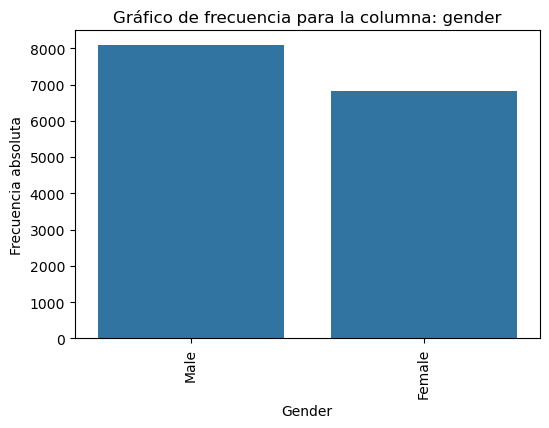

,Frecuencia relativa (%)
gender,
Male,54.275168
Female,45.724832


In [30]:
eda_uni_cat(data, 'gender')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0960



attrition,0,1
gender,,
Female,47.585498,52.414502
Male,57.202918,42.797082


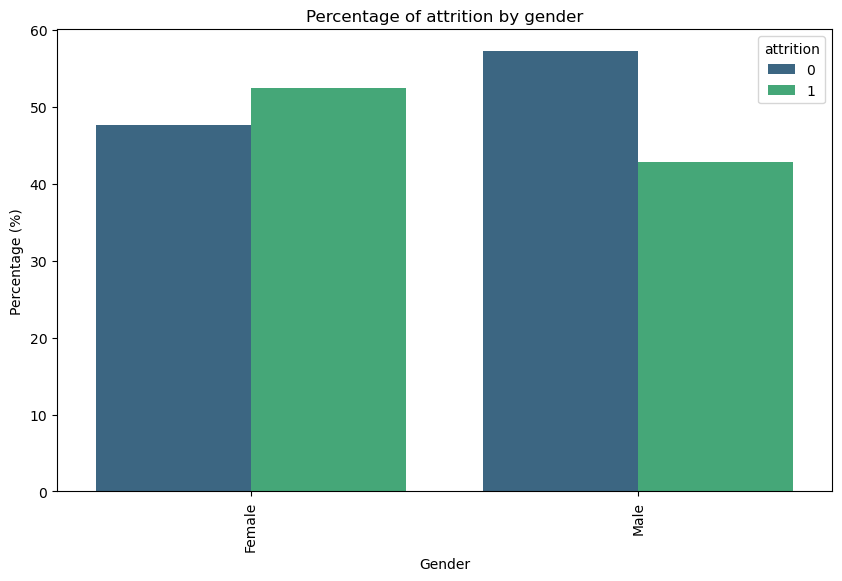

In [31]:
eda_bi_cat(data, 'gender', 'attrition')

### Attrition

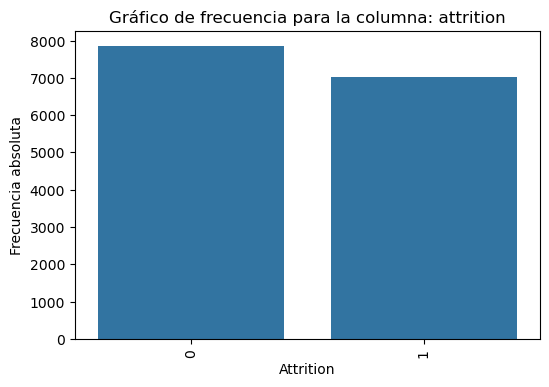

,Frecuencia relativa (%)
attrition,
0,52.805369
1,47.194631


In [32]:
eda_uni_cat(data, 'attrition')

### Job role

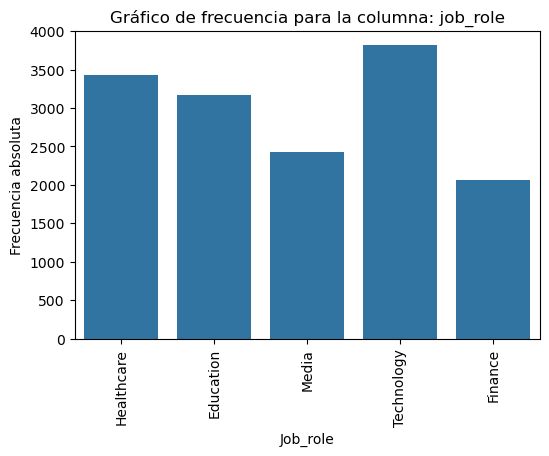

,Frecuencia relativa (%)
job_role,
Technology,25.604027
Healthcare,23.033557
Education,21.261745
Media,16.255034
Finance,13.845638


In [33]:
eda_uni_cat(data, 'job_role')

p-value de Chi-cuadrado: 0.0073
Cramér's V: 0.0306



attrition,0,1
job_role,,
Education,51.041667,48.958333
Finance,52.544838,47.455162
Healthcare,51.689977,48.310023
Media,55.491329,44.508671
Technology,53.709043,46.290957


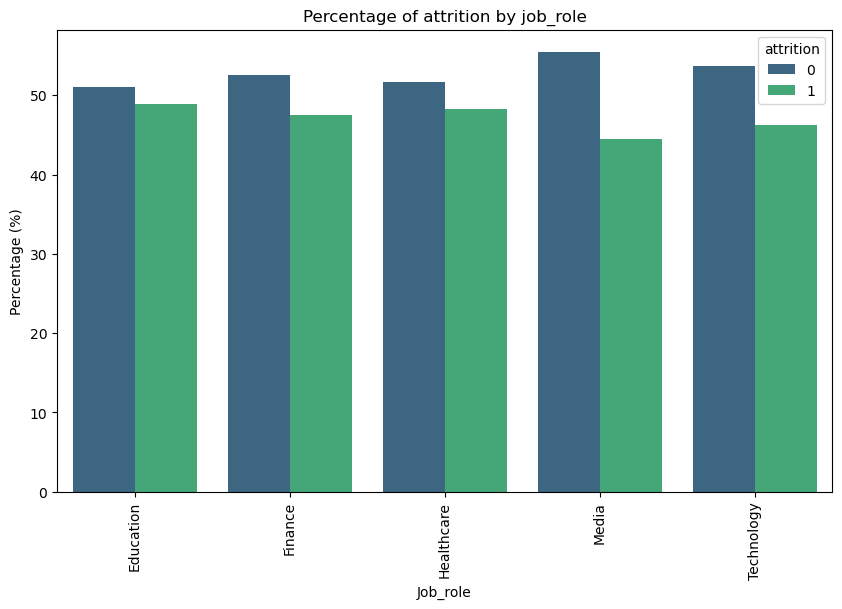

In [34]:
eda_bi_cat(data, 'job_role', 'attrition')

### Work life balance

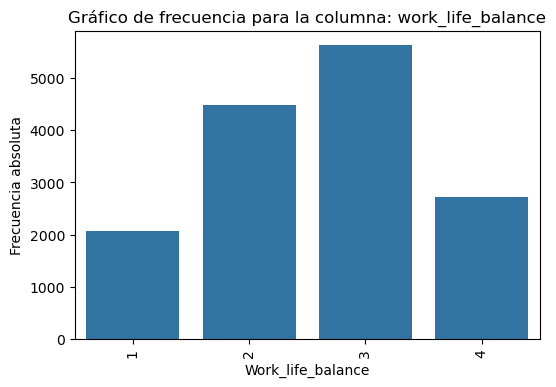

,Frecuencia relativa (%)
work_life_balance,
3,37.785235
2,30.087248
4,18.208054
1,13.919463


In [35]:
eda_uni_cat(data, 'work_life_balance')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2080



attrition,0,1
work_life_balance,,
1,39.537126,60.462874
2,42.070042,57.929958
3,60.373002,39.626998
4,64.983413,35.016587


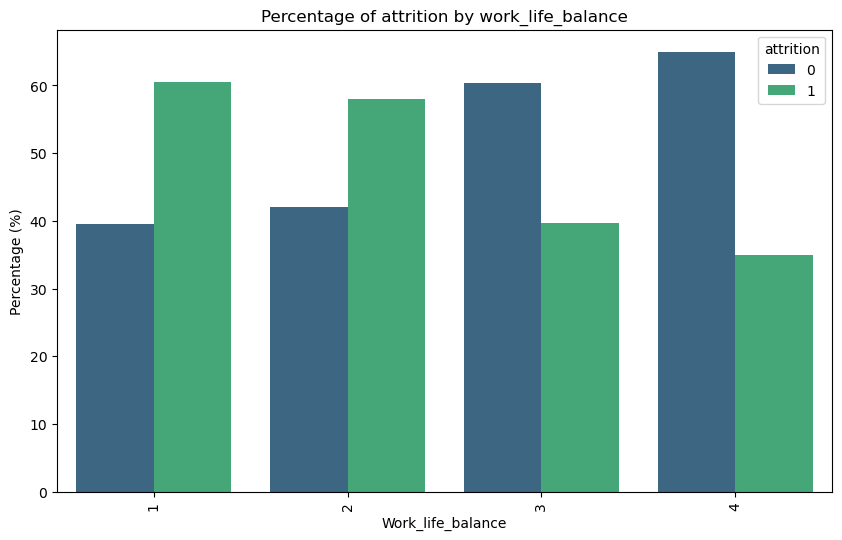

In [36]:
eda_bi_cat(data, 'work_life_balance', 'attrition')

### Job satisfaction

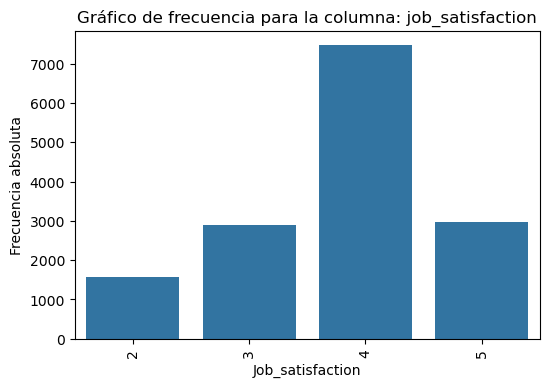

,Frecuencia relativa (%)
job_satisfaction,
4,50.107383
5,19.919463
3,19.463087
2,10.510067


In [37]:
eda_uni_cat(data, 'job_satisfaction')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0885



attrition,0,1
job_satisfaction,,
2,45.849298,54.150702
3,54.379310,45.620690
4,56.201447,43.798553
5,46.394879,53.605121


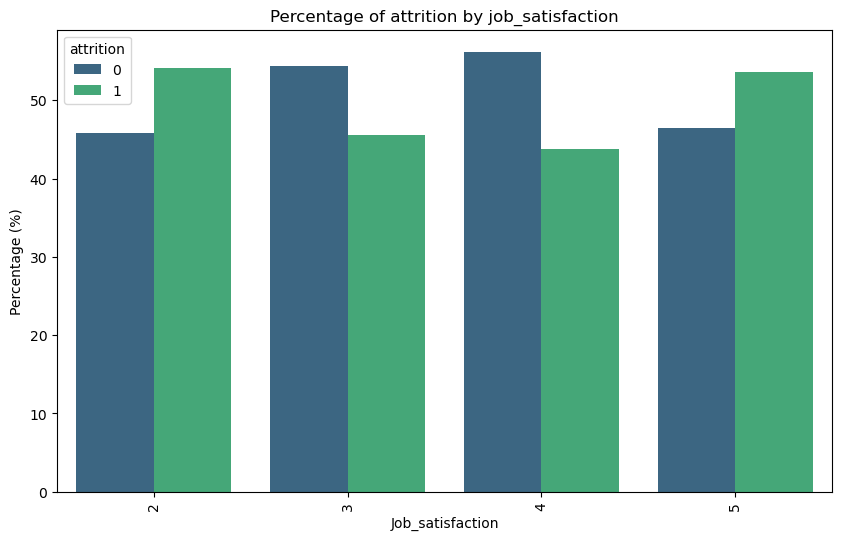

In [38]:
eda_bi_cat(data, 'job_satisfaction', 'attrition')

### Education level

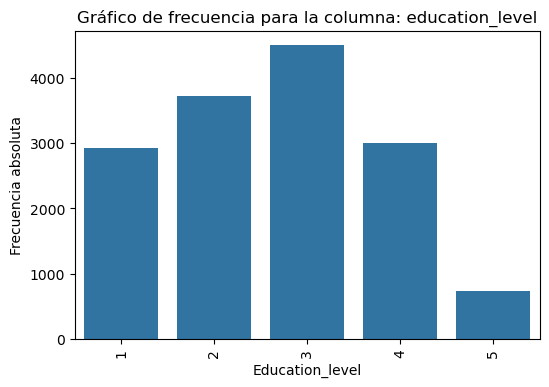

,Frecuencia relativa (%)
education_level,
3,30.234899
2,25.060403
4,20.140940
1,19.677852
5,4.885906


In [39]:
eda_uni_cat(data, 'education_level')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.1130



attrition,0,1
education_level,,
1,51.227831,48.772169
2,50.535619,49.464381
3,52.497225,47.502775
4,51.649450,48.350550
5,77.472527,22.527473


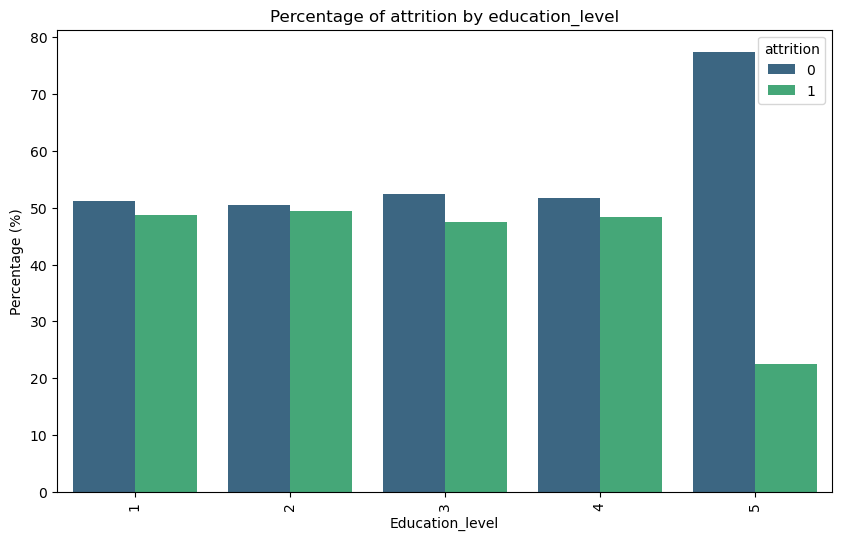

In [42]:
eda_bi_cat(data, 'education_level', 'attrition')

### Marital status

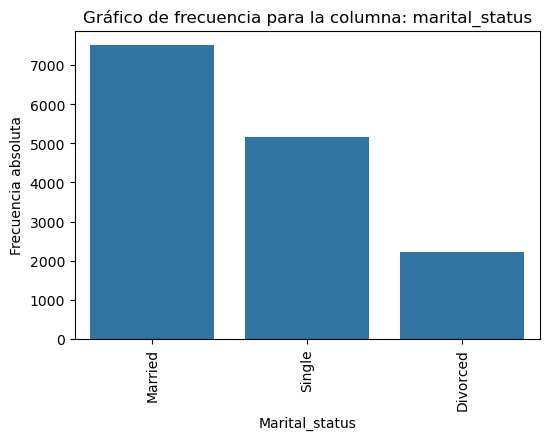

,Frecuencia relativa (%)
marital_status,
Married,50.409396
Single,34.671141
Divorced,14.919463


In [43]:
eda_uni_cat(data, 'marital_status')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2859



attrition,0,1
marital_status,,
Divorced,58.749438,41.250562
Married,64.398882,35.601118
Single,33.391405,66.608595


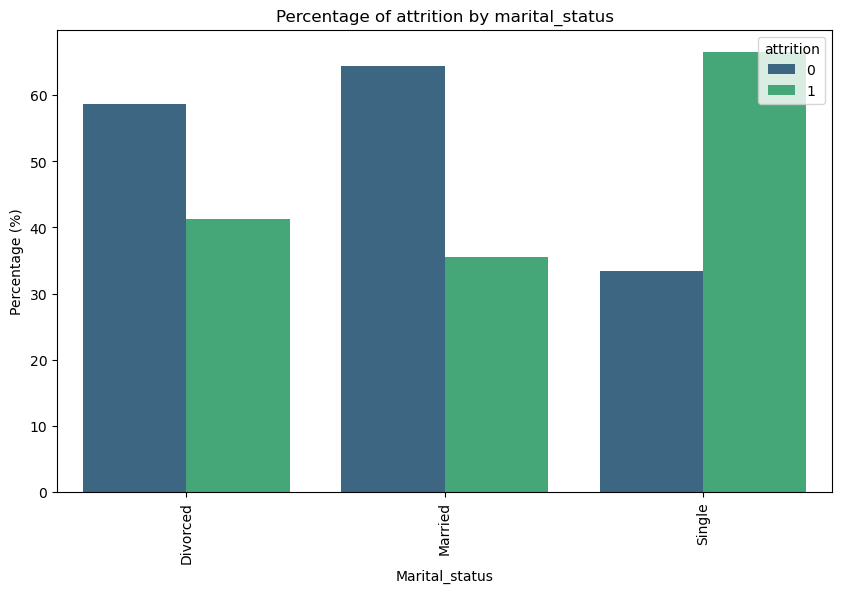

In [44]:
eda_bi_cat(data, 'marital_status', 'attrition')

### Company size

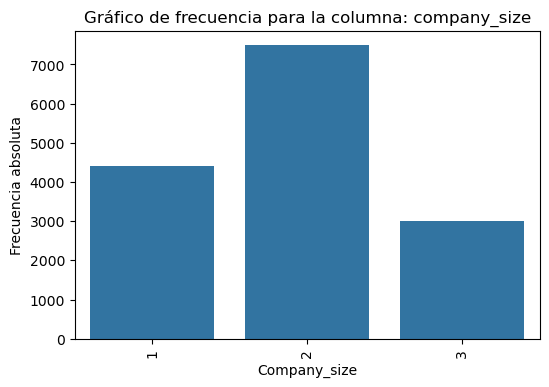

,Frecuencia relativa (%)
company_size,
2,50.241611
1,29.664430
3,20.093960


In [45]:
eda_uni_cat(data, 'company_size')

p-value de Chi-cuadrado: 0.0281
Cramér's V: 0.0219



attrition,0,1
company_size,,
1,51.153846,48.846154
2,53.660166,46.339834
3,53.106212,46.893788


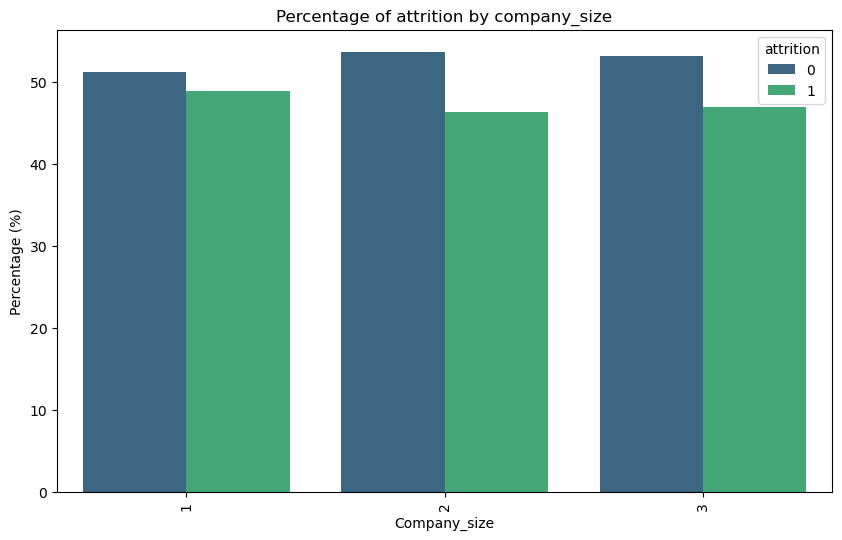

In [46]:
eda_bi_cat(data, 'company_size', 'attrition')

### Remote work

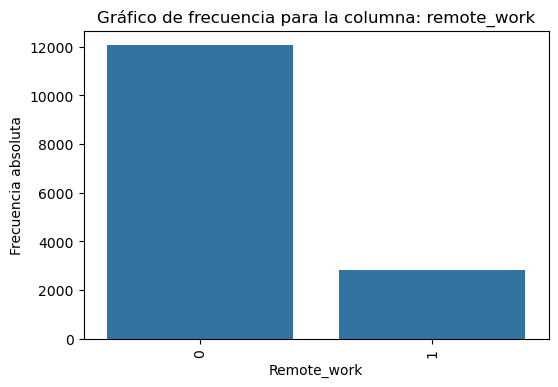

,Frecuencia relativa (%)
remote_work,
0,80.946309
1,19.053691


In [47]:
eda_uni_cat(data, 'remote_work')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.2242



attrition,0,1
remote_work,,
0,47.375839,52.624161
1,75.871786,24.128214


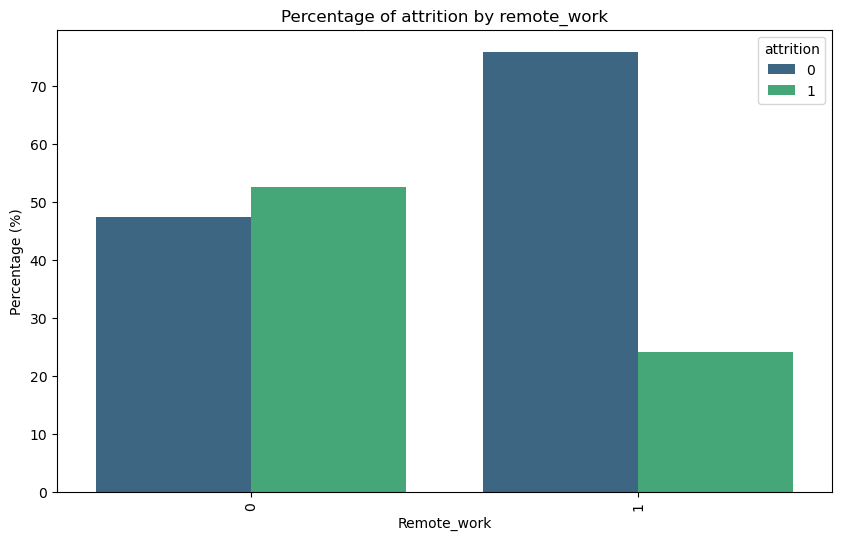

In [48]:
eda_bi_cat(data, 'remote_work', 'attrition')

### Leadership opportunities

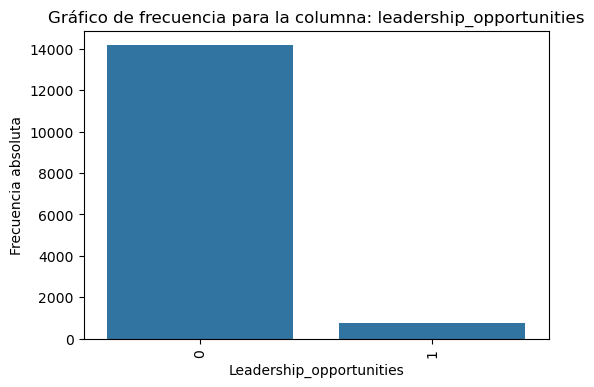

,Frecuencia relativa (%)
leadership_opportunities,
0,95.067114
1,4.932886


In [49]:
eda_uni_cat(data, 'leadership_opportunities')

p-value de Chi-cuadrado: 0.0213
Cramér's V: 0.0192



attrition,0,1
leadership_opportunities,,
0,52.587363,47.412637
1,57.006803,42.993197


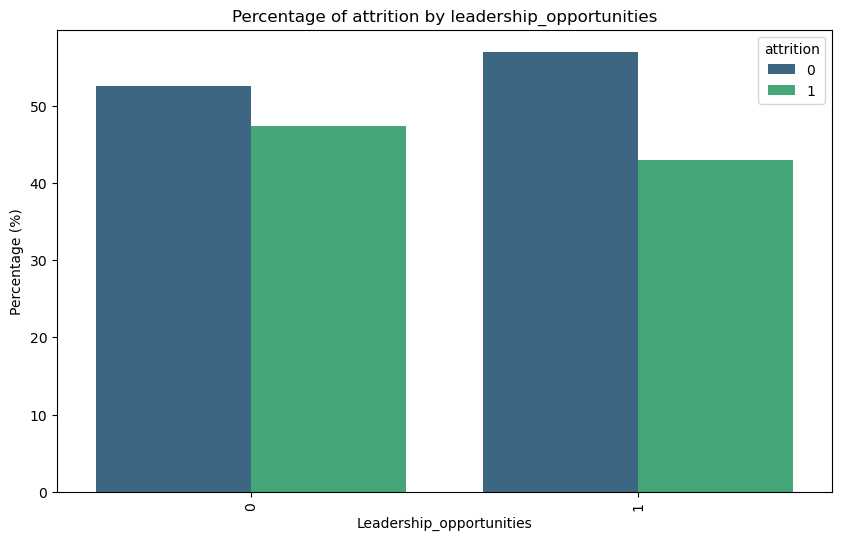

In [50]:
eda_bi_cat(data, 'leadership_opportunities', 'attrition')

### Innovation oppotunities

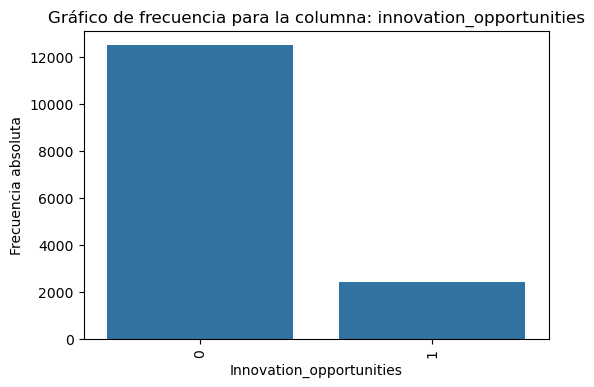

,Frecuencia relativa (%)
innovation_opportunities,
0,83.885906
1,16.114094


In [51]:
eda_uni_cat(data, 'innovation_opportunities')

p-value de Chi-cuadrado: 0.0089
Cramér's V: 0.0216



attrition,0,1
innovation_opportunities,,
0,52.332187,47.667813
1,55.268638,44.731362


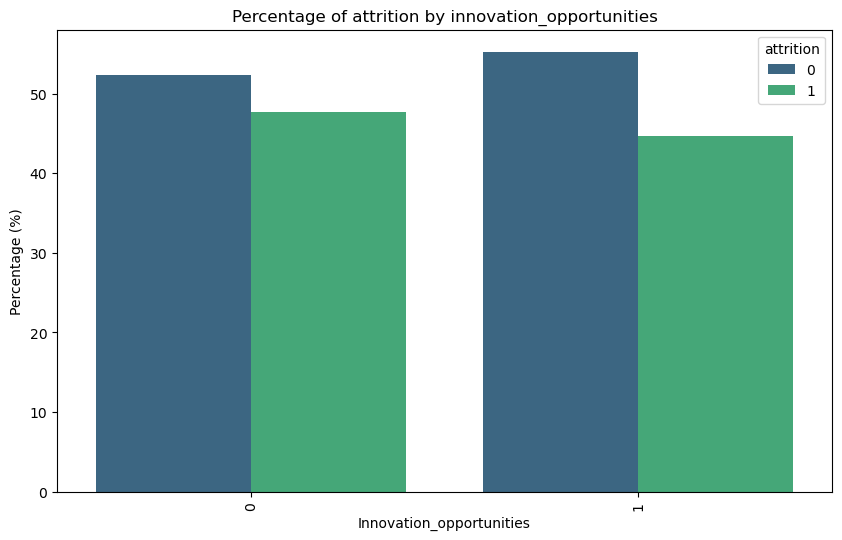

In [52]:
eda_bi_cat(data, 'innovation_opportunities', 'attrition')

### Company reputation

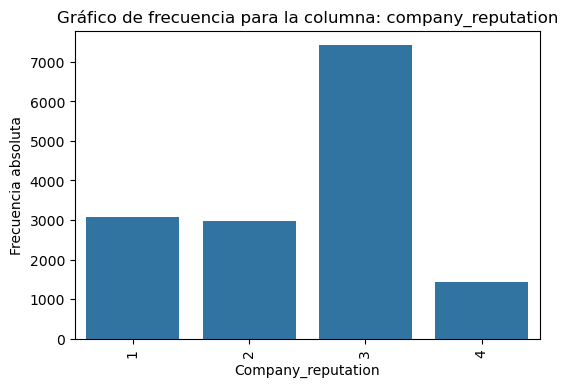

,Frecuencia relativa (%)
company_reputation,
3,49.771812
1,20.684564
2,19.926174
4,9.617450


In [53]:
eda_uni_cat(data, 'company_reputation')

p-value de Chi-cuadrado: 0.0000
Cramér's V: 0.0926



attrition,0,1
company_reputation,,
1,45.846853,54.153147
2,48.905355,51.094645
3,56.661273,43.338727
4,55.896720,44.103280


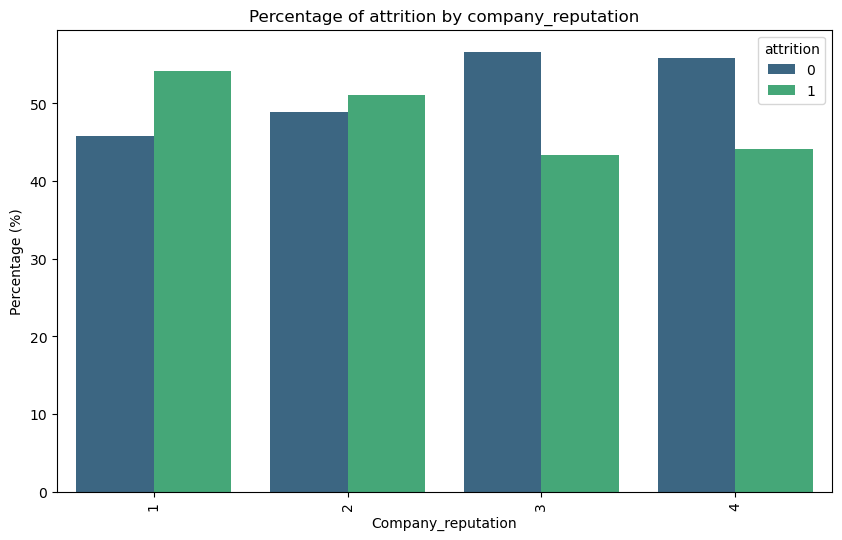

In [54]:
eda_bi_cat(data, 'company_reputation', 'attrition')

## EDA numerical columns

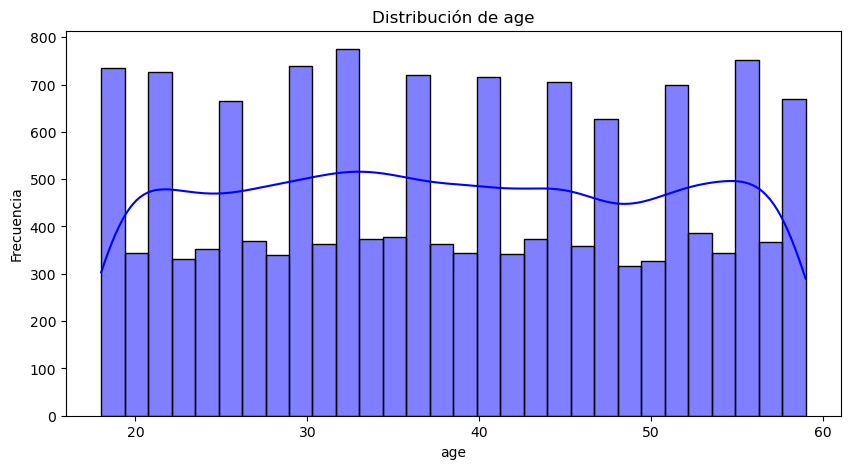

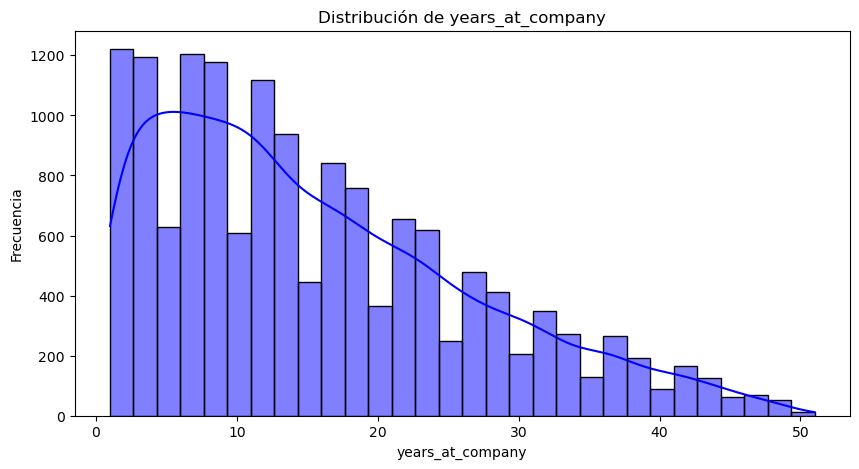

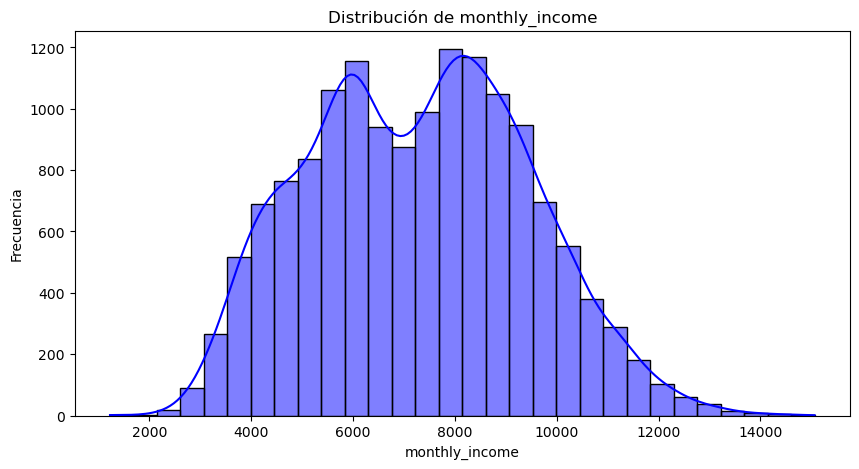

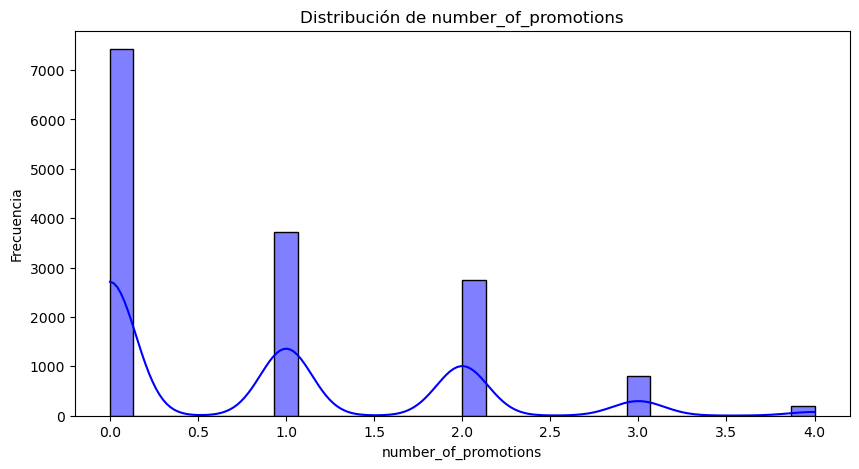

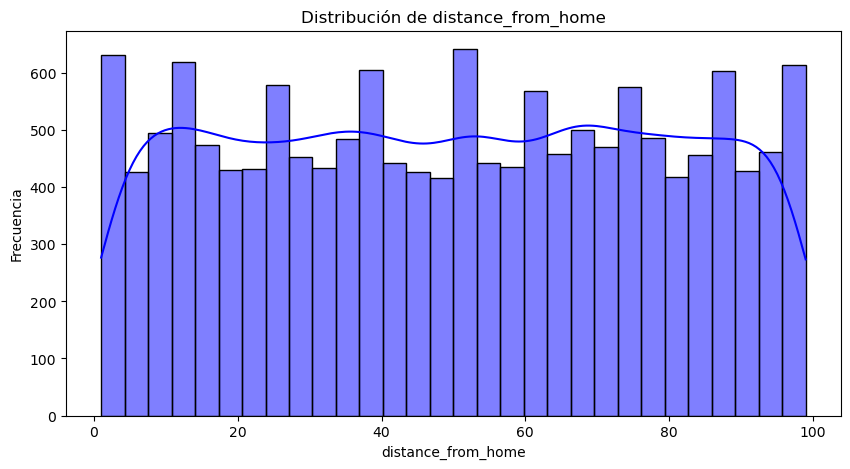

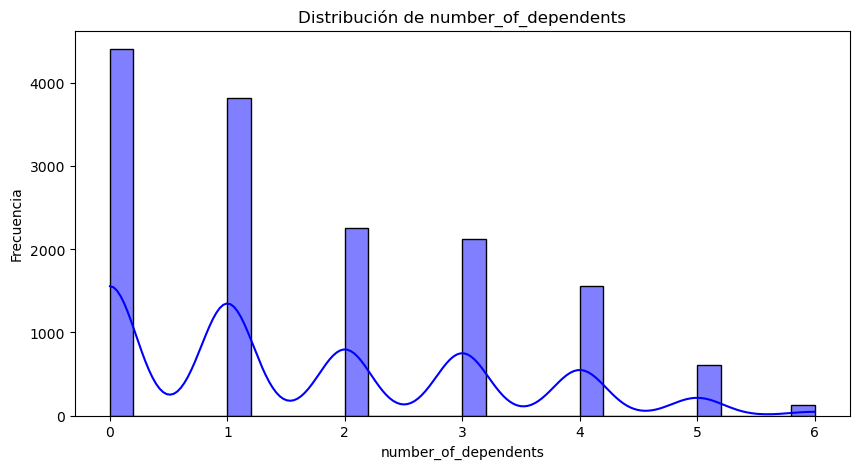

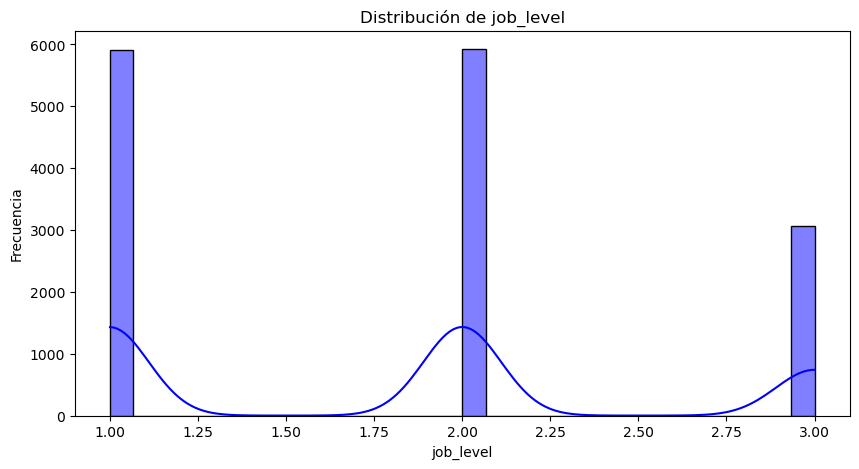

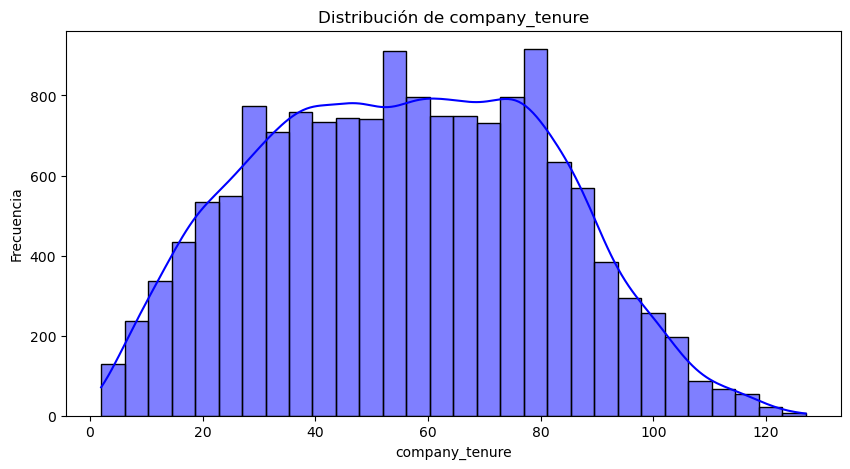

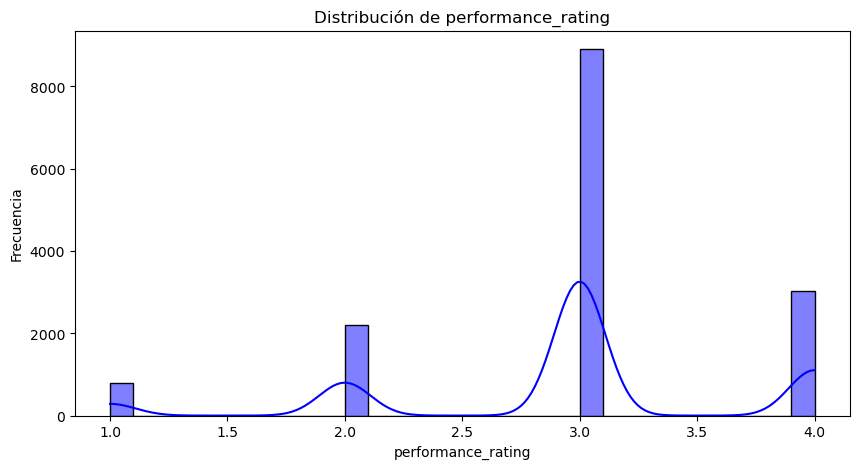

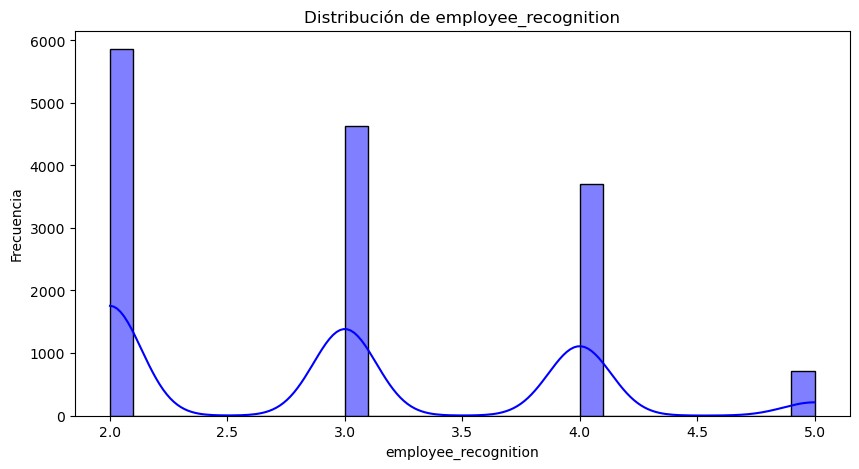

In [55]:
# Análisis univariable de variables numéricas
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

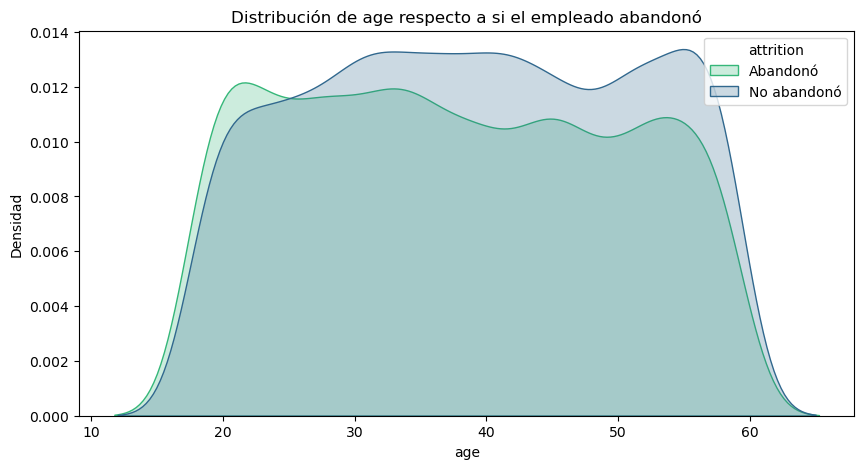

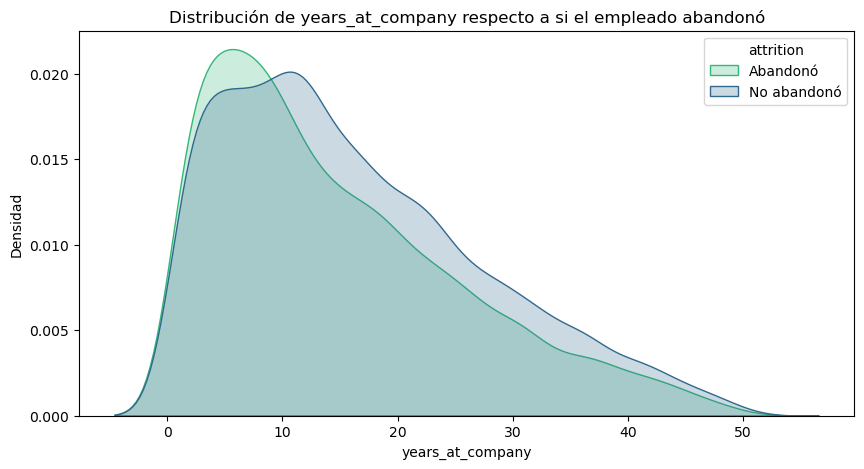

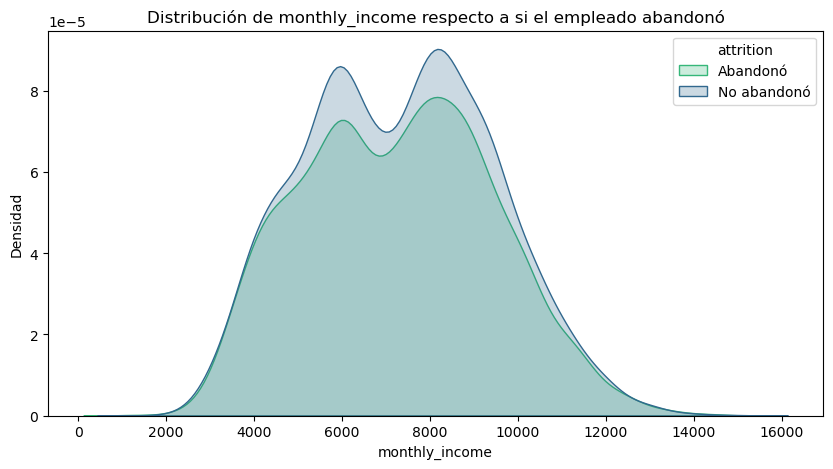

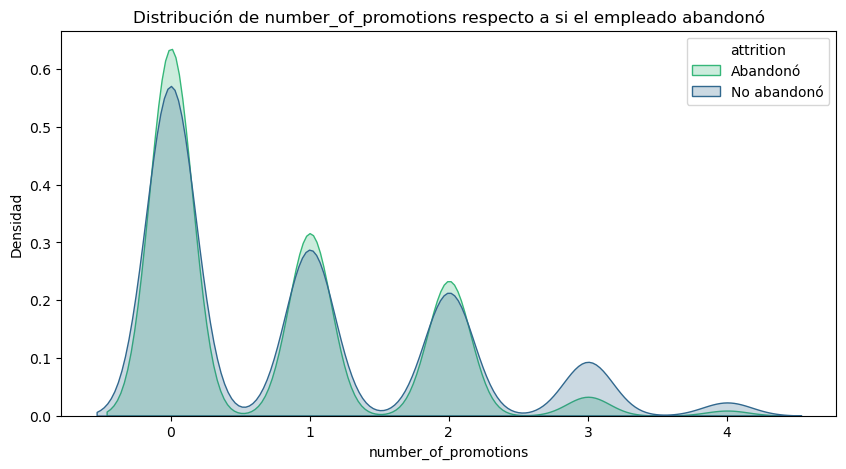

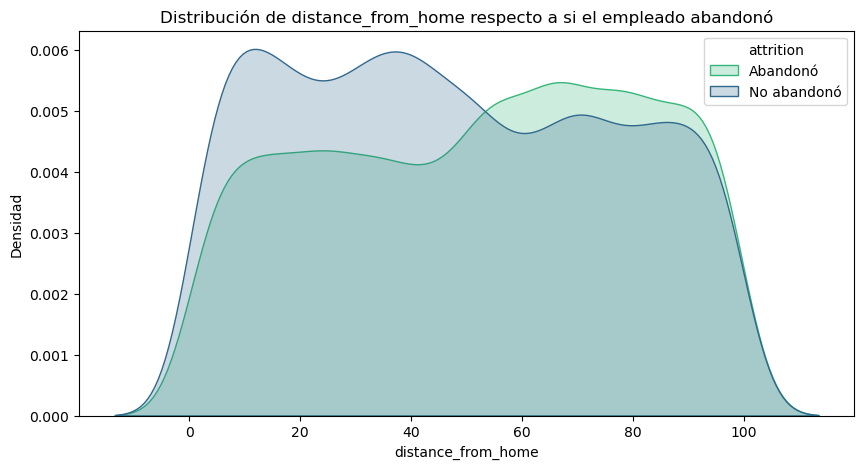

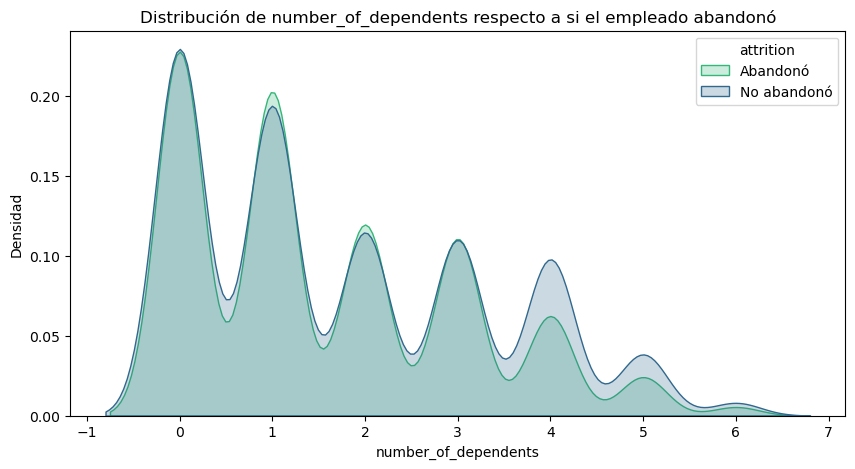

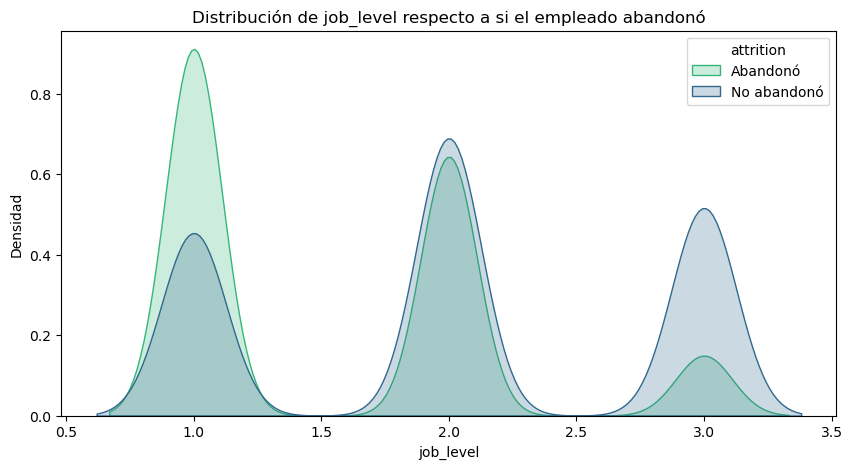

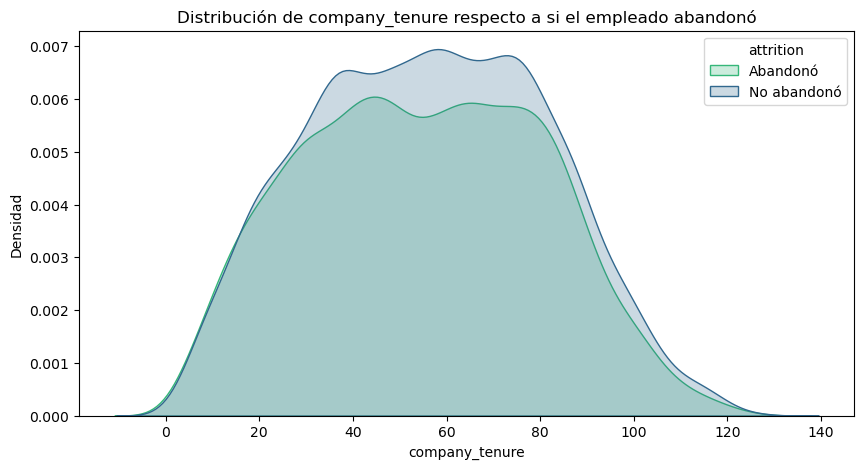

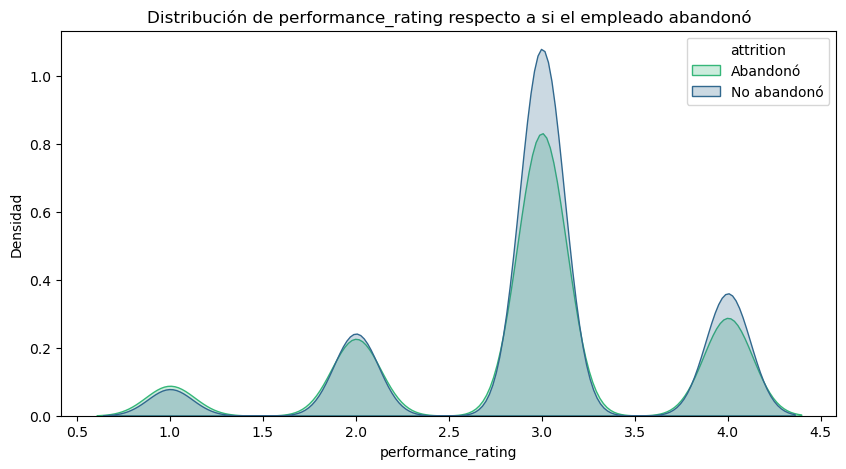

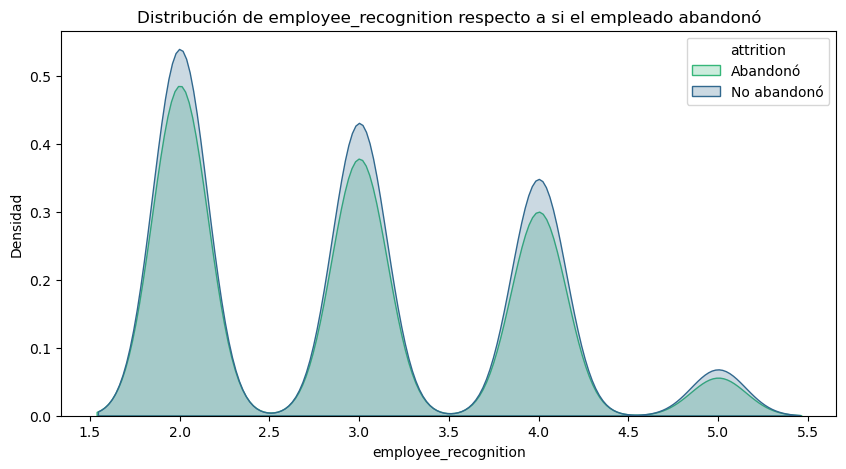

In [57]:
# Análisis bivariable de variables numéricas respecto a 'attrition'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=data, x=column, hue='attrition', fill=True, palette='viridis')
    plt.title(f'Distribución de {column} respecto a si el empleado abandonó')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend(title='attrition', labels=['Abandonó' , 'No abandonó'])
    plt.show()

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


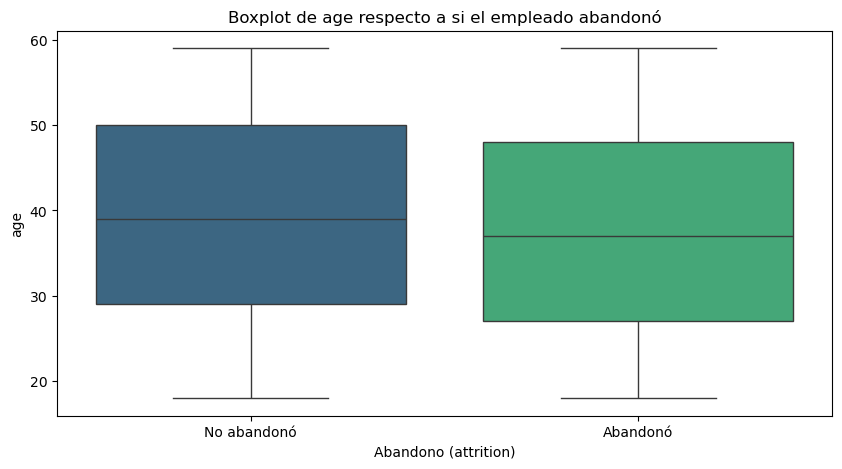

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


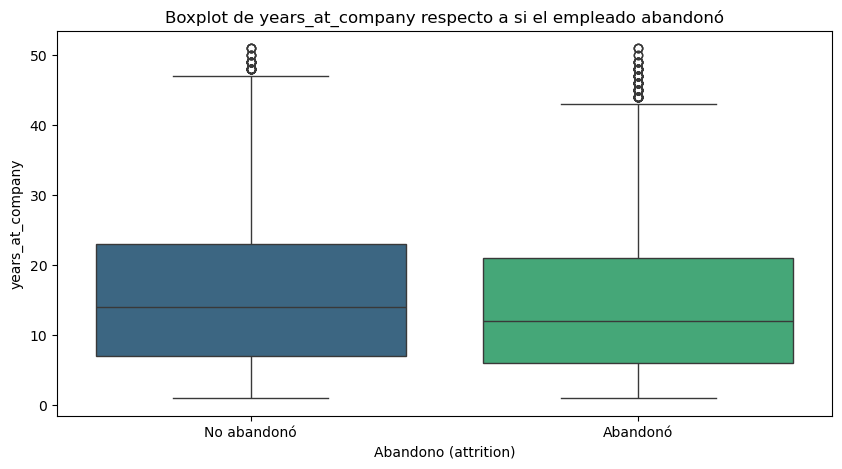

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


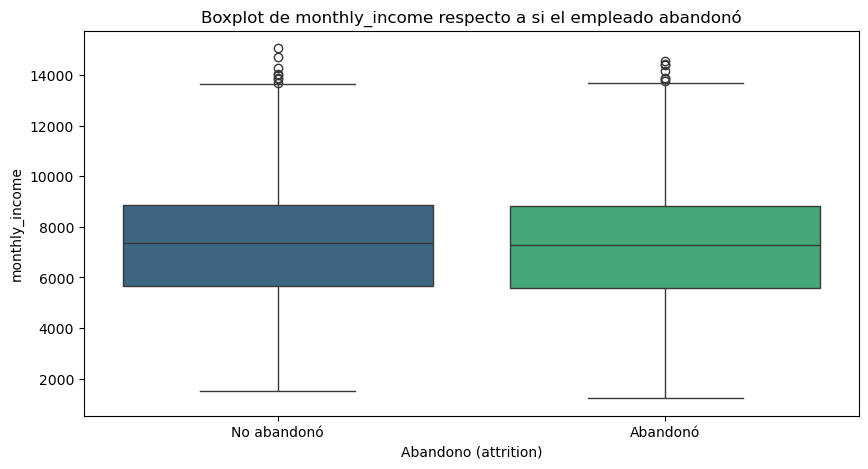

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


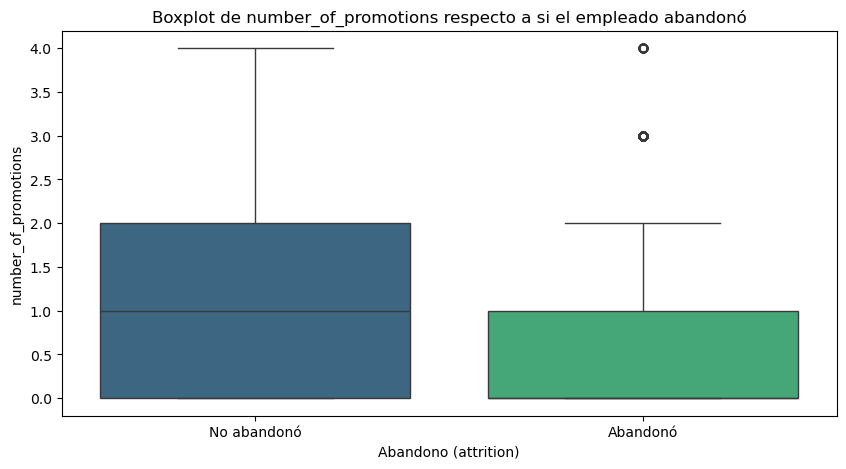

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


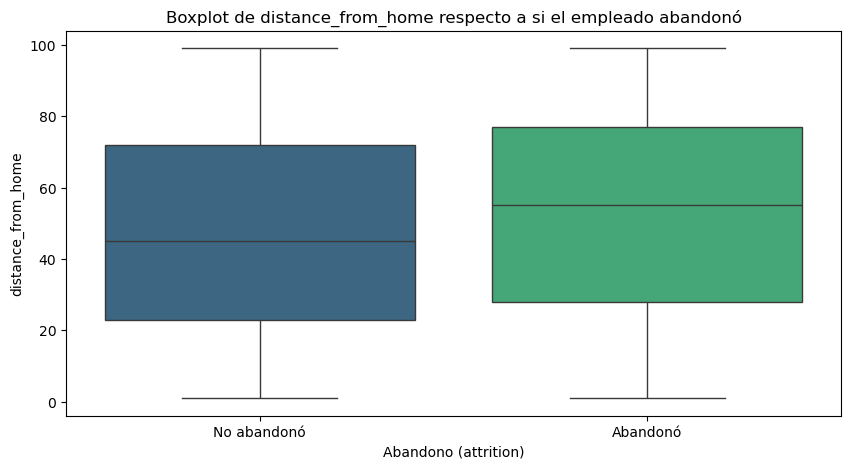

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


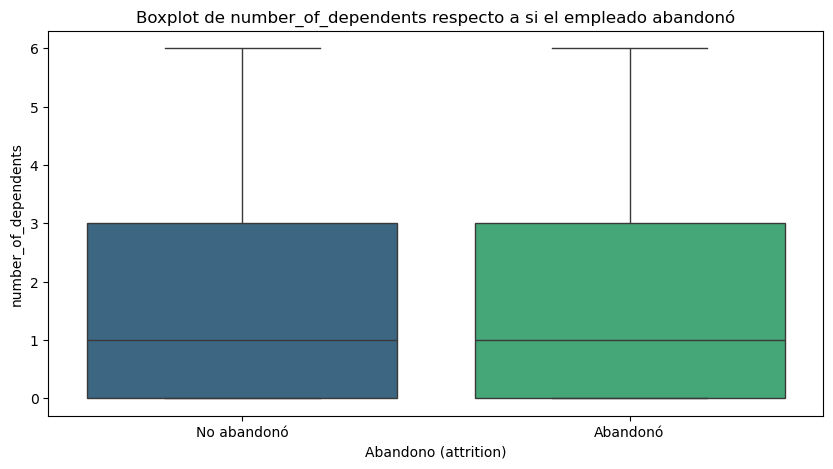

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


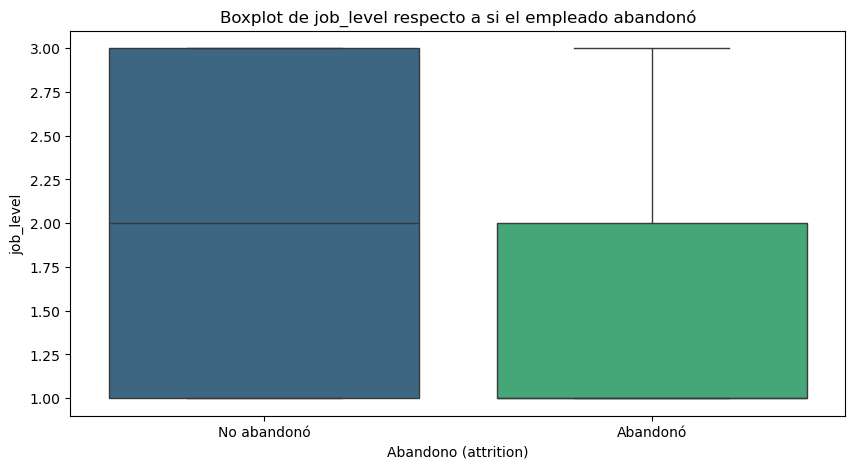

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


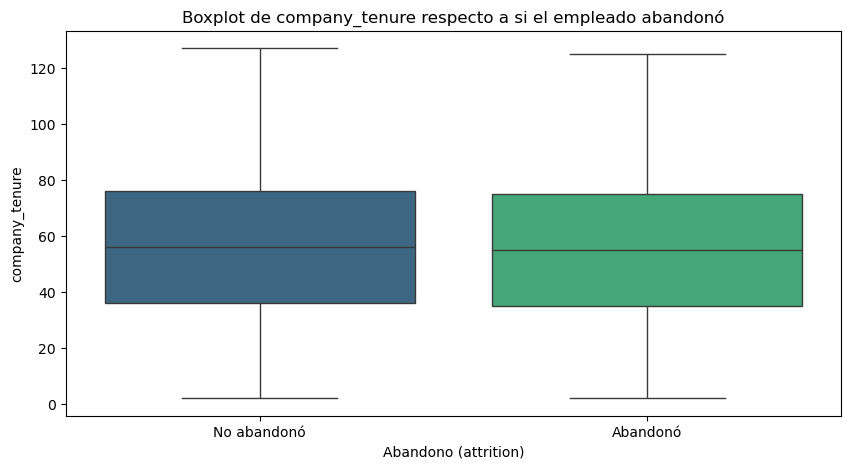

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


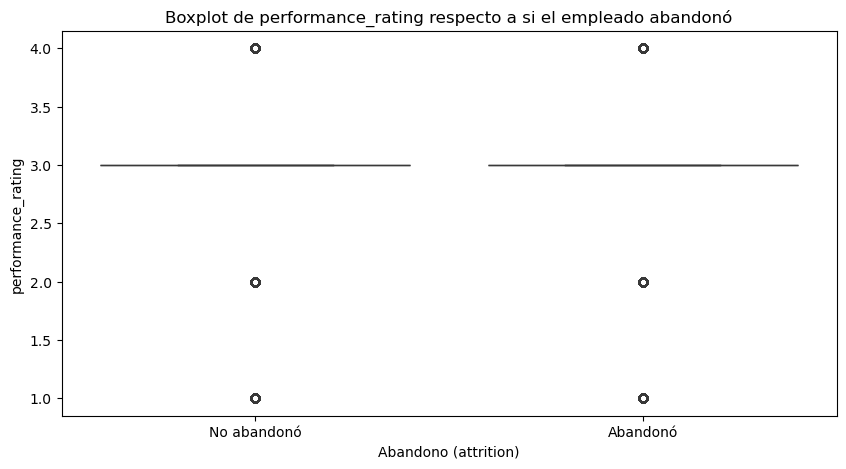

C:\Users\almuo\AppData\Local\Temp\ipykernel_16644\2053744789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='attrition', y=column, palette='viridis')


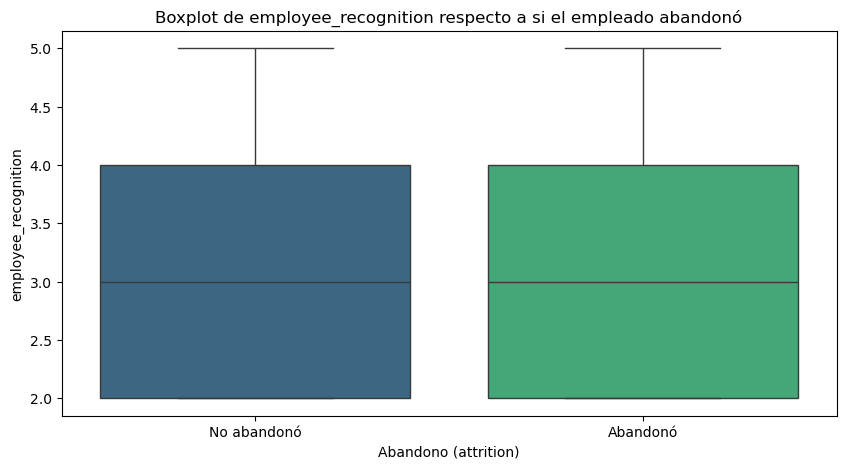

In [58]:
# Boxplots de las variables numéricas respecto a 'attrition'
for column in data_numerics:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='attrition', y=column, palette='viridis')
    plt.title(f'Boxplot de {column} respecto a si el empleado abandonó')
    plt.xlabel('Abandono (attrition)')
    plt.ylabel(column)
    plt.xticks([0, 1], ['No abandonó', 'Abandonó'])
    plt.show()